In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Loading Model

In [3]:
model = tf.keras.models.load_model('trained_model.keras')

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

### Visualizaing Single Image of Test set

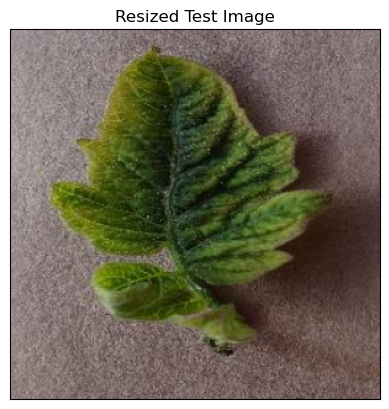

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Image path
image_path = "test/TomatoYellowCurlVirus1.JPG"

# Read the image
img = cv2.imread(image_path)

# Check if the image was loaded successfully
if img is None:
    print("Error: Unable to load image.")
else:
    # Resize the image
    img_resized = cv2.resize(img, (300, 300))  # Resize to 300x300 pixels

    # Convert BGR to RGB
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img_rgb)
    plt.title("Resized Test Image")
    plt.xticks([])
    plt.yticks([])
    plt.show()



## Testing Model

In [6]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
print(input_arr.shape)

(1, 128, 128, 3)


In [7]:
predictions = model.predict(input_arr)
predictions,predictions.shape

1/1 [==============================] - 17s 17s/step


(array([[2.0360840e-08, 7.1384720e-09, 6.9744465e-07, 2.5465610e-07,
         9.7601118e-09, 7.0894345e-07, 1.2218969e-08, 7.0546537e-07,
         1.1227211e-10, 2.5345412e-07, 1.2321794e-10, 6.2208204e-07,
         2.2820304e-07, 6.3515063e-03, 8.6341583e-09, 1.2415262e-06,
         1.7689966e-07, 9.2390101e-10, 2.3041142e-04, 2.1243493e-07,
         4.8766879e-08, 1.5026180e-04, 1.3105411e-07, 1.5620688e-04,
         1.2302920e-07, 3.5313290e-06, 1.0863012e-02, 2.8226057e-07,
         3.4922006e-05, 6.4544878e-03, 3.8037685e-06, 2.4093129e-06,
         1.8128412e-05, 4.7106914e-02, 1.8005897e-04, 9.2843634e-01,
         1.2360515e-06, 9.6829126e-07]], dtype=float32),
 (1, 38))

In [8]:
result_index = np.argmax(predictions)
print(result_index)

35


In [9]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

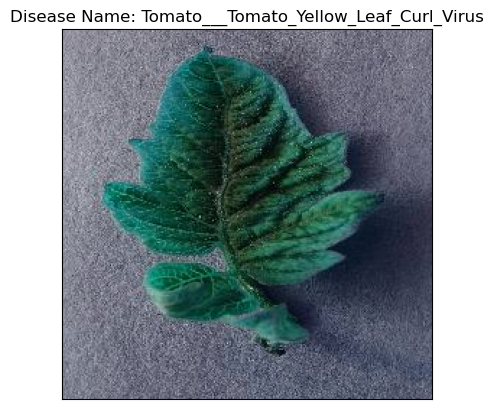

In [10]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
model_prediction

'Tomato___Tomato_Yellow_Leaf_Curl_Virus'